In [73]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt

from qiskit import Aer
from tqdm.notebook import tqdm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=4, suppress=None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Breast Cancer Data

### Load Data

In [74]:
data = load_breast_cancer()
x = data.data
y = data.target.reshape(-1, 1)

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=100, test_size=100)

## PCA

In [75]:
#x_train_scaled = scaler(x_train, mode="standard")
pca = PCA(n_components=4)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [87]:
x_train_qcn = scaler(x_train_pca, mode="uniform", a=-np.pi/2, b=np.pi/2)
x_train_dnn = scaler(x_train_pca, mode="standard")

x_test_qcn = scaler(x_test_pca, mode="uniform", a=-np.pi/2, b=np.pi/2)
x_test_dnn = scaler(x_test_pca, mode="standard")

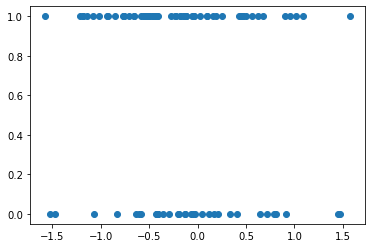

In [88]:
plt.plot(x_train_qcn[:,3], y_train_dnn,"o")

  0%|          | 0/10 [00:00<?, ?it/s]

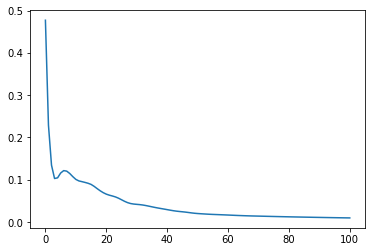

0.006063210373796974


In [89]:
np.random.seed(42)

dnn_list = []
for i in tqdm(range(10)):
    dnn = sequential_dnn(dim = [4, 5, 1])
    dnn.train(x_train_dnn, y_train, epochs = 100)
    dnn_list.append(dnn)
    
saver(dnn_list, data_path("cancer_dnn_pca"))
plt.plot(dnn_list[0].loss)
plt.show()
print(dnn_list[7].loss[-1])

In [93]:
y_pred = dnn_list[0].predict(x_test_dnn)
loss = np.mean((y_pred - y_test)**2)
print(loss)

0.028894029497670976


In [94]:
np.random.seed(42)

qcn_list = []
for i in tqdm(range(1)):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [4, 4, 1],
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         shots=0)
    
    qcn.train(x_train_qcn, y_train, epochs=100, verbose=True)
    qcn_list.append(qcn)

saver(qcn_list, data_path("cancer_qnn_pca"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.3584266139380151
epoch: 1, loss: 0.27295350147651926
epoch: 2, loss: 0.23003118156834904
epoch: 3, loss: 0.214439635694633
epoch: 4, loss: 0.20465587943377683
epoch: 5, loss: 0.19156366307444106
epoch: 6, loss: 0.1770251541666193
epoch: 7, loss: 0.16488837054866212
epoch: 8, loss: 0.15711169801724278
epoch: 9, loss: 0.15358090075295838
epoch: 10, loss: 0.1532378920913299
epoch: 11, loss: 0.15311585649669288
epoch: 12, loss: 0.15081909972319935
epoch: 13, loss: 0.14565007841045893
epoch: 14, loss: 0.13764730818183307
epoch: 15, loss: 0.12762520340986597
epoch: 16, loss: 0.11764531199184161
epoch: 17, loss: 0.11008702081222788
epoch: 18, loss: 0.10515921773304156
epoch: 19, loss: 0.10096548633301511
epoch: 20, loss: 0.09714495415716025
epoch: 21, loss: 0.09468407431167393
epoch: 22, loss: 0.09393855044194685
epoch: 23, loss: 0.09420904802740385
epoch: 24, loss: 0.0945614212647934
epoch: 25, loss: 0.09438107597200919
epoch: 26, loss: 0.09340858748825365
epoch: 27, loss: 

In [99]:
y_pred = qcn_list[0].predict(x_test_qcn)
loss = np.mean((y_pred - y_test)**2)
print(loss)

0.0741489278418883


In [95]:
qcn = sequential_qnn(n_qubits = [4,],
                         dim = [4, 1],
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=4),
                         shots=0)

In [96]:
qcn.train(x_train_qcn, y_train, epochs=100, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.2100215167989977
epoch: 1, loss: 0.1772130143688329
epoch: 2, loss: 0.15497718796025717
epoch: 3, loss: 0.13884683714798812
epoch: 4, loss: 0.1285231125985276
epoch: 5, loss: 0.12277142503865507
epoch: 6, loss: 0.11917154130438717
epoch: 7, loss: 0.1167829342971624
epoch: 8, loss: 0.11523303428085412
epoch: 9, loss: 0.11403899742812311
epoch: 10, loss: 0.1128903138537837
epoch: 11, loss: 0.11161213531840812
epoch: 12, loss: 0.11014908215203947
epoch: 13, loss: 0.10855007284660889
epoch: 14, loss: 0.10688927618168298
epoch: 15, loss: 0.1053111072228333
epoch: 16, loss: 0.10402688833050988
epoch: 17, loss: 0.10322266003228632
epoch: 18, loss: 0.1029510818001866
epoch: 19, loss: 0.10305478294177893
epoch: 20, loss: 0.10321099526182265
epoch: 21, loss: 0.1031401085134676
epoch: 22, loss: 0.10277499773593267
epoch: 23, loss: 0.10222353860022365
epoch: 24, loss: 0.10162696783558363
epoch: 25, loss: 0.10105662347058317
epoch: 26, loss: 0.10048988885966241
epoch: 27, loss: 0.

In [100]:
qcn1 = sequential_qnn(n_qubits = [4],
                         dim = [4, 1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=4),
                         shots=0)

In [101]:
qcn1.train(x_train_qcn, y_train, epochs=100, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.25243861014523516
epoch: 1, loss: 0.2415227818665963
epoch: 2, loss: 0.23747885401915916
epoch: 3, loss: 0.23517347951176423
epoch: 4, loss: 0.23219387699679817
epoch: 5, loss: 0.22901829155397596
epoch: 6, loss: 0.22655297069709138
epoch: 7, loss: 0.22533693278334144
epoch: 8, loss: 0.2250091575093417
epoch: 9, loss: 0.2246643508991472
epoch: 10, loss: 0.22370383626311374
epoch: 11, loss: 0.2221106432483083
epoch: 12, loss: 0.22019298487773853
epoch: 13, loss: 0.21823148873321357
epoch: 14, loss: 0.21631654031169695
epoch: 15, loss: 0.21439764947679354
epoch: 16, loss: 0.21244245845438023
epoch: 17, loss: 0.21051324287265913
epoch: 18, loss: 0.2086678137502682
epoch: 19, loss: 0.20682728244401943
epoch: 20, loss: 0.20476023472523888
epoch: 21, loss: 0.20218379757115312
epoch: 22, loss: 0.19890385626417417
epoch: 23, loss: 0.19491691247773815
epoch: 24, loss: 0.1904004525014473
epoch: 25, loss: 0.18563211916937367
epoch: 26, loss: 0.1810236113409773
epoch: 27, loss: 0